In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

In [ ]:
loyalty_benefits = pd.read_csv('/content/loyalty benefits.csv')
loyalty_benefits

,Class ID,Group,%cashback
0,2,cvs,5
1,2,Offline Beverage,5
2,2,data,5
3,3,cvs,7
4,3,Offline Beverage,7
5,3,data,7
6,3,marketplace,2
7,3,supermarket,2
8,4,cvs,12
9,4,Offline Beverage,12


In [ ]:
loyalty_points = pd.read_csv('/content/loyalty points.csv')
loyalty_points

,Service Group,Point Mechanism,Maximum Point Per Trans
0,supermarket,1 points/1000VND GMV,500 points
1,data,10 points/1000VND GMV,1000 points
2,cvs,1 points/1000VND GMV,300 points
3,marketplace,1 points/1000VND GMV,500 points
4,Coffee chains and Milk tea,1 points/1000VND GMV,500 points
5,Offline Beverage,1 points/1000VND GMV,300 points


In [ ]:
merchants = pd.read_csv('/content/merchants.csv')
merchants

,ServiceID,Service Group,Merchant,MerchantID
0,7eleven,cvs,7eleven,1
1,MOMOIOQC20191008,cvs,7eleven,1
2,opcaeon,supermarket,Aeon Mall,2
3,MOMOGPCQ20190613,supermarket,Aeon Mall,2
4,MOMOONXG20191120,supermarket,Aeon Mall,2
...,...,...,...,...
213,buycard_data_vinaphone,data,Vinaphone,43
214,gift_buycard_data_vinaphone,data,Vinaphone,43
215,topup_data_vina,data,Vinaphone,43
216,waynescoffee,Coffee chains and Milk tea,Waynes Coffee,44


In [ ]:
merchants['Merchant'].nunique()

45

In [ ]:
merchants['MerchantID'].nunique()

44

In [ ]:
merchants['Merchant'].unique()

array(['7eleven', 'Aeon Mall', 'Big C', 'Bobapop', 'BSMART',
       'Cà Phê Ông Bầu', 'CHEESE COFFEE', 'Circle K', 'Co.opmart',
       'Coffee House', 'Cộng Cà phê', 'Công ty TNHH Cà Phê Gemini',
       'Đá Đen Coffe', 'E coffee', 'FAMILYMART', 'FINELIFE', 'GongCha',
       'GS25', 'GUTA CAFE', 'Highlands', 'Katinat', 'Koi The', 'Koi Thé',
       'LAZADA', 'Lotte Mart', 'MEGA-PHINDELI CAFE', 'Milano Coffee',
       'Ministop', 'MM Mega Market', 'Mobifone', 'Passio', 'PHUC LONG',
       'SHARTEA', 'THE ALLEY', 'The Coffee House', 'THỨC COFFEE', 'Tiki',
       'TOCOTOCO', 'Toocha', 'Trung Nguyên', 'VIETTEL', 'Viettel',
       'VINAMILK-ONLINE', 'Vinaphone', 'Waynes Coffee'], dtype=object)

Since the number of unique Merchant should be equal to the number of unique Merchant ID. I investigated the unique values of Merchant and noticed that VIETTEL and Viettel are the same company. So, I convert VIETTEL 
into Viettel.

In [ ]:
merchants['Merchant'] = merchants['Merchant'].replace(to_replace='VIETTEL',value='Viettel')

In [ ]:
transactions = pd.read_csv('/content/transactions.csv')
transactions

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs
...,...,...,...,...,...,...,...
52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data
52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data
52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data
52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data


In [ ]:
transactions.dtypes

DATE                    object
Order_id                 int64
NEWVERTICAL_Merchant    object
MerchantID               int64
User_id                  int64
GMV                      int64
Service Group           object
dtype: object

In [ ]:
transactions['DATE'] = pd.to_datetime(transactions['DATE'])

# **PART 1. Data processing**

**Calculate daily loyalty points**

In [ ]:
loyalty_points = []
transactions = transactions.reset_index()
for index, row in transactions.iterrows():
  if row['Service Group'] in ['supermarket', 'marketplace', 'Coffee chains and Milk tea']:
    if row['GMV']/1000 < 500:
      loyalty_points.append(row['GMV']/1000)
    else: loyalty_points.append(500)
  if row['Service Group'] == 'data':
    if row['GMV']/100 < 1000:
      loyalty_points.append(row['GMV']/100)
    else: loyalty_points.append(1000)
  if row['Service Group'] in ['cvs','Offline Beverage']:
     if row['GMV']/1000 < 300:
      loyalty_points.append(row['GMV']/1000)
     else: loyalty_points.append(300)

In [ ]:
transactions['Loyalty Points'] = loyalty_points
transactions

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points
0,0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0
1,1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0
2,2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6
3,3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0
4,4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0
...,...,...,...,...,...,...,...,...,...
52755,52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0
52756,52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0
52757,52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0
52758,52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0


**How** **many user archived rank Gold at the end on March?**

Because after 30 days, loyalty points from transaction will be reset. So, the accumulated loyalty points at the end of March will start from March 2nd.

In [ ]:
end_of_March_ranking = transactions[(transactions['DATE']>= '2022-03-02') & (transactions['DATE']< '2022-04-01')]
end_of_March_ranking

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points
42637,42637,2022-03-02,21549087636,Supermarket,25,45715492,55000,supermarket,55.0
42638,42638,2022-03-02,21558157954,Supermarket,25,44080459,203600,supermarket,203.6
42639,42639,2022-03-02,21545970988,Supermarket,25,37381541,526400,supermarket,500.0
42640,42640,2022-03-02,21557916934,Supermarket,25,44080459,25000,supermarket,25.0
42641,42641,2022-03-02,21562502367,CVS,28,47025182,36000,cvs,36.0
...,...,...,...,...,...,...,...,...,...
52755,52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0
52756,52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0
52757,52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0
52758,52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0


In [ ]:
end_of_March_total_point = end_of_March_ranking.groupby('User_id')['Loyalty Points'].sum().reset_index()
end_of_March_total_point

,User_id,Loyalty Points
0,162483,79.0
1,298202,48.0
2,321062,627.0
3,414676,620.0
4,422520,840.0
...,...,...
1916,61260552,850.0
1917,61281293,1565.0
1918,61347721,2.0
1919,61397286,150.0


In [ ]:
end_of_March_total_point['Ranking'] = end_of_March_total_point.apply(lambda row: 'STANDARD' if row['Loyalty Points'] < 1000
                                                                     else 'SILVER' if row['Loyalty Points'] < 2000
                                                                     else 'GOLD' if row['Loyalty Points'] < 5000
                                                                     else 'DIAMOND', axis=1)
end_of_March_total_point['Ranking'].value_counts()

STANDARD    1490
SILVER       294
GOLD         123
DIAMOND       14
Name: Ranking, dtype: int64

CONCLUSION: There are 123 Gold Ranking users at the end of March 2022

**Calculate total cashback for February**

In [ ]:
def calculate_loyalty_point(user, date):
  user_transactions = transactions[transactions['User_id'] == user]
  upper_filter = user_transactions['DATE'] <= date
  lower_filter = user_transactions['DATE'] >= (date - timedelta(days=30))
  within_30d_transactions = user_transactions[upper_filter & lower_filter]
  accumulated_loyalty_points = within_30d_transactions['Loyalty Points'].sum() 
  return accumulated_loyalty_points                                                                                

In [ ]:
transactions['30 days accumulated loyalty points'] = transactions.apply(lambda row: calculate_loyalty_point(row['User_id'],row['DATE']), axis=1)

In [ ]:
transactions['Class ID'] = transactions.apply(lambda row: 1 if row['30 days accumulated loyalty points'] < 1000
                                                                     else 2 if row['30 days accumulated loyalty points'] < 2000
                                                                     else 3 if row['30 days accumulated loyalty points'] < 5000
                                                                     else 4, axis=1)

In [ ]:
cashback = transactions.merge(loyalty_benefits, left_on = ['Service Group', 'Class ID'], right_on = ['Group', 'Class ID'], how = 'left', suffixes=(True,False))
cashback

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points,30 days accumulated loyalty points,Class ID,Group,%cashback
0,0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0,100.0,1,NaN,NaN
1,1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0,5.0,1,NaN,NaN
2,2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6,106.6,1,NaN,NaN
3,3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0,270.0,1,NaN,NaN
4,4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0,80.0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52755,52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0,760.0,1,NaN,NaN
52756,52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0,1916.0,2,data,5.0
52757,52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0,600.0,1,NaN,NaN
52758,52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0,600.0,1,NaN,NaN


Since some transactions are not rewarded with cashback, I replace NaN values with 0.

In [ ]:
cashback.drop('Group', axis=1 ,inplace=True)
cashback['%cashback'] = cashback['%cashback'].fillna(0)
cashback['Cashback'] = cashback.apply(lambda row: row['GMV']*row['%cashback']/100 if row['GMV']*row['%cashback']/100 < 10000
                                      else 10000, axis = 1)
cashback

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points,30 days accumulated loyalty points,Class ID,%cashback,Cashback
0,0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0,100.0,1,0.0,0.0
1,1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0,5.0,1,0.0,0.0
2,2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6,106.6,1,0.0,0.0
3,3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0,270.0,1,0.0,0.0
4,4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0,80.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52755,52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0,760.0,1,0.0,0.0
52756,52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0,1916.0,2,5.0,500.0
52757,52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0,600.0,1,0.0,0.0
52758,52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0,600.0,1,0.0,0.0


In [ ]:
feb_cashback = cashback[(cashback['DATE'] >= '2022-02-01') & (cashback['DATE'] < '2022-03-01')]
feb_cashback['Cashback'].sum()

4668841.74

CONCLUSION: The total cashback for February is 4,668,841.74 VND.

**Plot weekly retention rate chart**

In [ ]:
def weekly_retention(user, date):
  user_transactions = transactions[transactions['User_id'] == user]
  upper_filter = user_transactions['DATE'] < date
  lower_filter = user_transactions['DATE'] >= (date - timedelta(days=8))
  within_7d_transactions = user_transactions[upper_filter & lower_filter]
  if len(within_7d_transactions) < 1:
    return 0
  else: 
    return 1

In [ ]:
transactions['7 days retention'] = transactions.apply(lambda row: weekly_retention(row['User_id'], row['DATE']), axis=1)
transactions

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points,30 days accumulated loyalty points,Class ID,7 days retention
0,0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0,100.0,1,0
1,1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0,5.0,1,0
2,2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6,106.6,1,0
3,3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0,270.0,1,0
4,4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0,80.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
52755,52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0,760.0,1,0
52756,52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0,1916.0,2,1
52757,52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0,600.0,1,1
52758,52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0,600.0,1,1


In [ ]:
retention = transactions.groupby('DATE')['7 days retention'].sum().reset_index()
retention

,DATE,7 days retention
0,2021-01-01,0
1,2021-01-02,1
2,2021-01-03,4
3,2021-01-04,5
4,2021-01-05,4
...,...,...
449,2022-03-27,271
450,2022-03-28,217
451,2022-03-29,317
452,2022-03-30,197


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


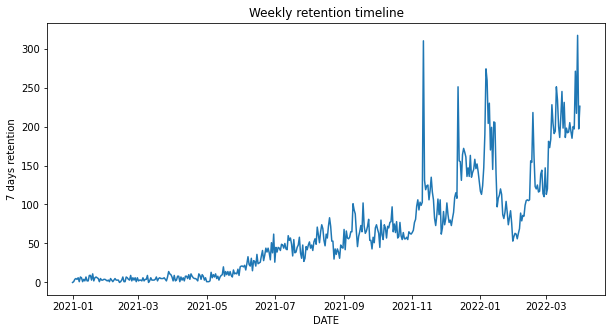

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(retention['DATE'],retention['7 days retention'])
plt.title('Weekly retention timeline')
plt.show()

# **Part 2. Analyze and comment**

**Plot daily transaction timeline**

In [ ]:
daily_transactions = transactions.groupby('DATE')['Order_id'].count().reset_index()
daily_transactions

,DATE,Order_id
0,2021-01-01,17
1,2021-01-02,20
2,2021-01-03,13
3,2021-01-04,16
4,2021-01-05,15
...,...,...
449,2022-03-27,498
450,2022-03-28,422
451,2022-03-29,493
452,2022-03-30,392


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


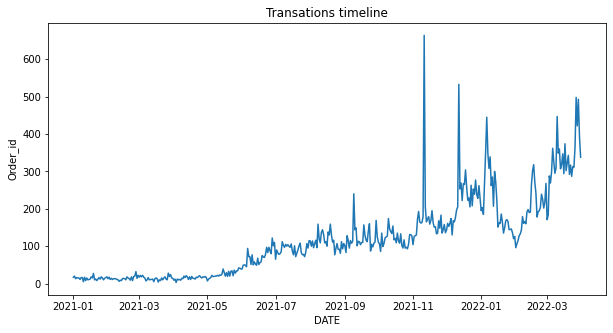

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(daily_transactions['DATE'],daily_transactions['Order_id'])
plt.title('Transations timeline')
plt.show()

In [ ]:
transactions['Day of Week'] = transactions['DATE'].dt.day_name()
DOW_order = transactions.groupby('Day of Week')['Order_id'].count().reset_index()
DOW_order

,Day of Week,Order_id
0,Friday,7101
1,Monday,7181
2,Saturday,7323
3,Sunday,7729
4,Thursday,8728
5,Tuesday,7353
6,Wednesday,7345


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


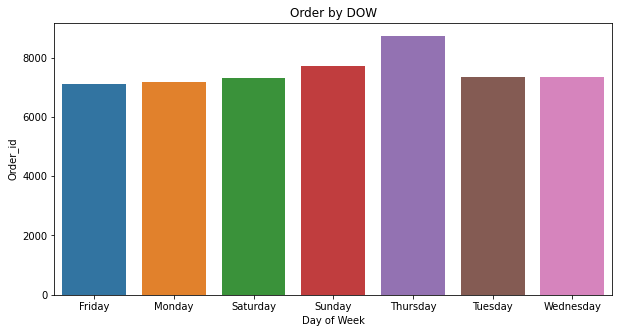

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(DOW_order['Day of Week'],DOW_order['Order_id'])
plt.title('Order by DOW')
plt.show()

In [ ]:
DOW_retention = transactions.groupby('Day of Week')['7 days retention'].sum().reset_index()
DOW_retention

,Day of Week,7 days retention
0,Friday,4173
1,Monday,4012
2,Saturday,3952
3,Sunday,4134
4,Thursday,4926
5,Tuesday,4190
6,Wednesday,4109


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


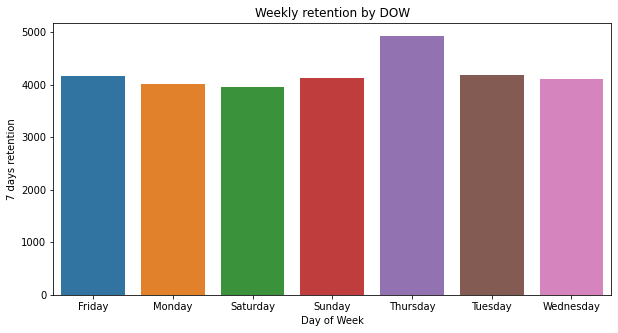

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(DOW_retention['Day of Week'],DOW_retention['7 days retention'])
plt.title('Weekly retention by DOW')
plt.show()

- Since Loyalty program launched, weekly retention rate and daily transactions have been increasing. Notably, from November 2021 to January 2022, the company recorded all-time high in these two metrics. From January 2022 to the end of March 2022, the two KPIs are uptrending.
- Tp increase user's performance monthly, Marketing department can:
    *   Create content that speaks to the customers and make it easy to understand. Update the old ones and track the traffic rate.
    *   Improve UX and UI of the website and mobile app.
    *   Focus marketing more on Thursday as this day have the highest transactions and weekly retention.
    *   Provide discount code, voucher for lost customer to bring them back with the company service.








**Proposal on changing the schemes of Loyalty benefits and Loyalty point to alleviate the cost amount**

In [ ]:
cashback

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points,30 days accumulated loyalty points,Class ID,%cashback,Cashback
0,0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0,100.0,1,0.0,0.0
1,1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0,5.0,1,0.0,0.0
2,2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6,106.6,1,0.0,0.0
3,3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0,270.0,1,0.0,0.0
4,4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0,80.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52755,52755,2022-03-31,22531432792,Airtime,41,53272777,30000,data,300.0,760.0,1,0.0,0.0
52756,52756,2022-03-31,22516959788,Airtime,41,41605249,10000,data,100.0,1916.0,2,5.0,500.0
52757,52757,2022-03-31,22518046622,Airtime,30,29029358,42000,data,420.0,600.0,1,0.0,0.0
52758,52758,2022-03-31,22518047037,Airtime,30,29029358,5000,data,50.0,600.0,1,0.0,0.0


How many users are rewarded with Cashback?

In [ ]:
cashback[cashback['%cashback']>0]['%cashback'].count()

13790

In [ ]:
cashback['%cashback'].value_counts()

0.0     38970
5.0      6846
2.0      3142
7.0      3032
12.0      770
Name: %cashback, dtype: int64

In [ ]:
cashback['Cashback'].describe()

count    52760.000000
mean      1106.749542
std       2643.447061
min          0.000000
25%          0.000000
50%          0.000000
75%        350.000000
max      10000.000000
Name: Cashback, dtype: float64

In [ ]:
cashback.groupby('Service Group').agg({'GMV':'sum','Cashback':'sum'}).reset_index().sort_values(by=['GMV'], ascending=False)

,Service Group,GMV,Cashback
4,marketplace,3925019072,23505543.92
2,cvs,1882831446,17810535.49
5,supermarket,1243618881,6979831.40
3,data,353137800,10056645.00
0,Coffee chains and Milk tea,154917495,0.00
1,Offline Beverage,1883000,39550.00


Data's GMV is only one-third of supermarket's GMV, but its Cashback is 1.5 times more than supermarket's.

In [ ]:
cashback.groupby('Class ID').agg({'GMV':'sum','Cashback':'sum'}).reset_index().sort_values(by=['GMV'], ascending=False)

,Class ID,GMV,Cashback
0,1,3234360133,0.00
1,2,1802276281,11705686.55
2,3,1458110689,25219315.14
3,4,1066660591,21467104.12


Class ID 3 is third in GMV but lead in Cashback with a large gap. So, Class ID 3 is overrewarded with Cashback.

In [ ]:
scheme = cashback.groupby(['Service Group', 'Class ID']).agg({'GMV':'sum','Cashback':'sum','Order_id':'nunique'})
scheme['Cashback/GMV ratio'] = scheme['Cashback'] / scheme['GMV']

In [ ]:
scheme

GMV     Cashback  Order_id  \
Service Group              Class ID                                      
Coffee chains and Milk tea 1          100627797         0.00      1496   
                           2           27375541         0.00       300   
                           3           19412384         0.00       235   
                           4            7501773         0.00        81   
Offline Beverage           1            1092000         0.00        19   
                           2             791000     39550.00        14   
cvs                        1          882132952         0.00      6847   
                           2          364966305   6994776.55      1759   
                           3          412314947   6457499.42      1251   
                           4          223417242   4358259.52       478   
data                       1          187249100         0.00     11307   
                           2           93582200   4671360.00      2869   
                           3           60153500   4131245.00      1655   
                           4           12153000   1254040.00       259   
marketplace                1         1525075486         0.00      9717   
                           2          985847890         0.00      2859   
                           3          738627008  11220646.02      2100   
                           4          675468688  12284897.90      1202   
supermarket                1          538182798         0.00      2701   
                           2          329713345         0.00      1004   
                           3          227602850   3409924.70       605   
                           4          148119888   3569906.70       417   

                                     Cashback/GMV ratio  
Service Group              Class ID                      
Coffee chains and Milk tea 1                   0.000000  
                           2                   0.000000  
                           3                   0.000000  
                           4                   0.000000  
Offline Beverage           1                   0.000000  
                           2                   0.050000  
cvs                        1                   0.000000  
                           2                   0.019166  
                           3                   0.015662  
                           4                   0.019507  
data                       1                   0.000000  
                           2                   0.049917  
                           3                   0.068678  
                           4                   0.103188  
marketplace                1                   0.000000  
                           2                   0.000000  
                           3                   0.015191  
                           4                   0.018187  
supermarket                1                   0.000000  
                           2                   0.000000  
                           3                   0.014982  
                           4                   0.024101

# **QUESTION 3**

Which user have 20 consecutive days in DIAMOND in March? Who have the most days?

In [ ]:
first = transactions['DATE'] >= '2022-03-01'
last = transactions['DATE'] < '2022-04-01'
march = transactions[first & last]
march_diamond = march[march['Class ID'] == 4]
march_diamond

,index,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points,30 days accumulated loyalty points,Class ID,7 days retention,Day of Week
42474,42474,2022-03-01,21535695588,Marketplace,37,57207697,490000,marketplace,490.0,5875.400,4,1,Tuesday
42478,42478,2022-03-01,21535406768,Marketplace,37,57207697,490000,marketplace,490.0,5875.400,4,1,Tuesday
42499,42499,2022-03-01,21511066166,Airtime,43,12229364,20000,data,200.0,7853.900,4,1,Tuesday
42522,42522,2022-03-01,21536667833,Marketplace,24,47662326,180400,marketplace,180.4,23585.726,4,1,Tuesday
42529,42529,2022-03-01,21537980470,Marketplace,24,57207697,20000,marketplace,20.0,5875.400,4,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52637,52637,2022-03-31,22540487177,Marketplace,24,44850195,150900,marketplace,150.9,5721.902,4,1,Thursday
52707,52707,2022-03-31,22553554958,Airtime,41,49689927,10000,data,100.0,9100.000,4,1,Thursday
52732,52732,2022-03-31,22545659290,Airtime,41,49689927,10000,data,100.0,9100.000,4,1,Thursday
52742,52742,2022-03-31,22516198917,Airtime,41,49689927,10000,data,100.0,9100.000,4,1,Thursday


In [ ]:
march_timeline = pd.date_range(start='2022-03-01', end='2022-03-31')
date_col = []
uid_col = []
for user_id in march_diamond['User_id'].unique():
  for date in march_timeline:
    uid_col.append(user_id)
    date_col.append(date)
march_users = pd.DataFrame(
    {'User_id' : uid_col,
     'DATE' : date_col
     })

Check if the timeline include 31 days for each user ID.

In [ ]:
march_users['User_id'].value_counts()

57207697    31
12229364    31
54788782    31
44850195    31
31244414    31
55443594    31
39619396    31
44119627    31
25993024    31
54960619    31
43933779    31
45426067    31
49689927    31
43160536    31
36884902    31
50185392    31
44901759    31
51432947    31
55200938    31
39314846    31
47662326    31
35461466    31
Name: User_id, dtype: int64

In [ ]:
march_users['Loyalty Points'] = march_users.apply(lambda row: calculate_loyalty_point(row['User_id'],row['DATE']), axis=1)
march_users = march_users.sort_values(by=['User_id', 'DATE'])

In [ ]:
loyalty_points = list(march_users['Loyalty Points'])
day_count = []
a = 0
for entry in loyalty_points:
  if len(day_count) % 31 == 0:
    a = 1
    day_count.append(a)
  else:
    if entry >= 5000:
      a = a + 1
      day_count.append(a)
    else:
      a = 1
      day_count.append(a)

march_users['Consecutive day count'] = day_count

In [ ]:
with pd.option_context('display.max_rows', None,'display.max_columns', None,
    'display.precision', 3,
                       ):
  print(march_users)

In [ ]:
result = march_users.groupby('User_id')['Consecutive day count'].max().reset_index()
result[result['Consecutive day count'] >= 20].sort_values(by = 'Consecutive day count' ,ascending = False)

,User_id,Consecutive day count
5,39314846,31
13,47662326,31
19,55200938,31
21,57207697,31
16,51432947,29
15,50185392,26
4,36884902,22
7,43160536,22


Check the result

In [ ]:
march_users[march_users['User_id'] == 39314846]

,User_id,DATE,Loyalty Points,Consecutive day count
93,39314846,2022-03-01,5636.52,1
94,39314846,2022-03-02,5636.52,2
95,39314846,2022-03-03,6910.72,3
96,39314846,2022-03-04,8962.72,4
97,39314846,2022-03-05,9739.96,5
98,39314846,2022-03-06,9421.88,6
99,39314846,2022-03-07,8754.79,7
100,39314846,2022-03-08,8754.79,8
101,39314846,2022-03-09,8754.79,9
102,39314846,2022-03-10,8622.79,10
